1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b

51
100
105
256


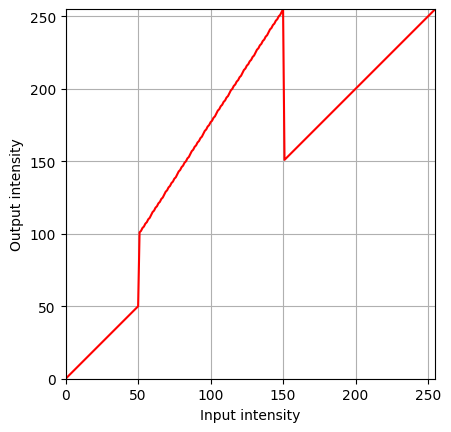

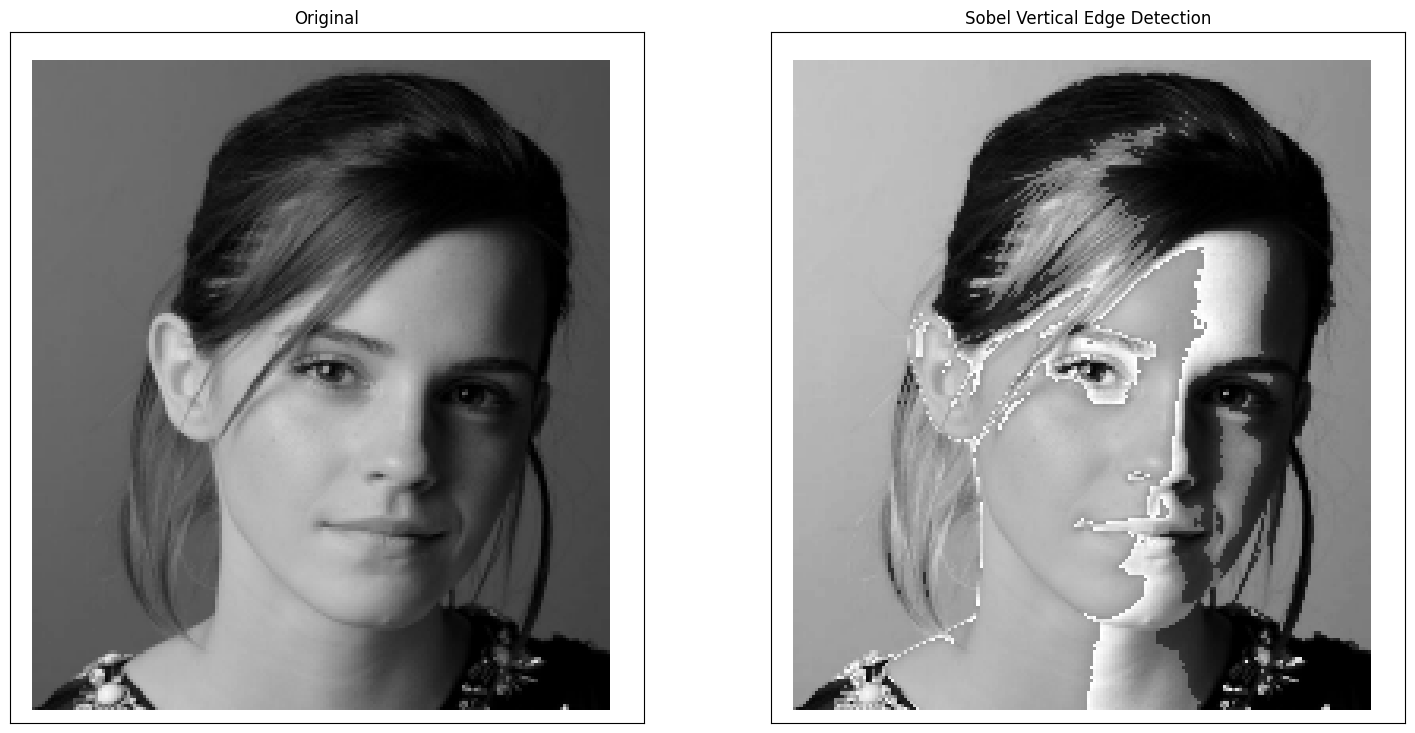

In [19]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100),(150, 255),(150, 150),(255,255)])
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3, 1] + 1, c[4,1], c[4,0] - c[3, 0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform, color='red')
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.grid(True)
plt.show()

img_orig = cv.imread("F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/ema.jpg", cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
#img = cv.imshow("Image", img_orig)
#cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
#img2 =cv.imshow("Image", image_transformed)
#cv.waitKey(0)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 18))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Sobel Vertical Edge Detection')
axes[1].set_xticks([]), axes[1].set_yticks([])

cv.destroyAllWindows()


2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots

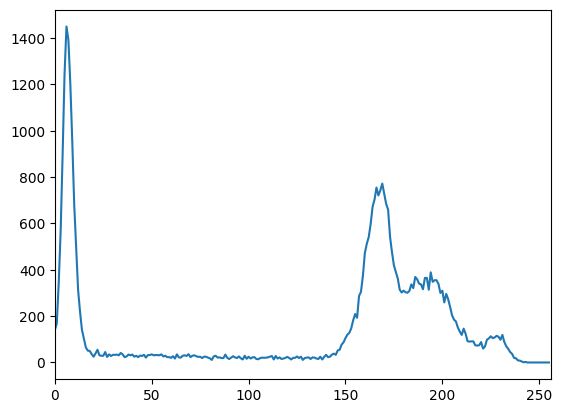

16
125
100
100
256


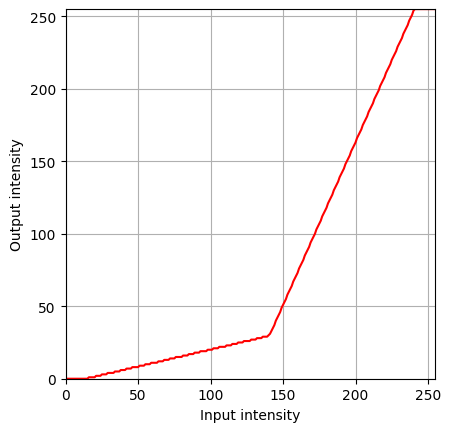

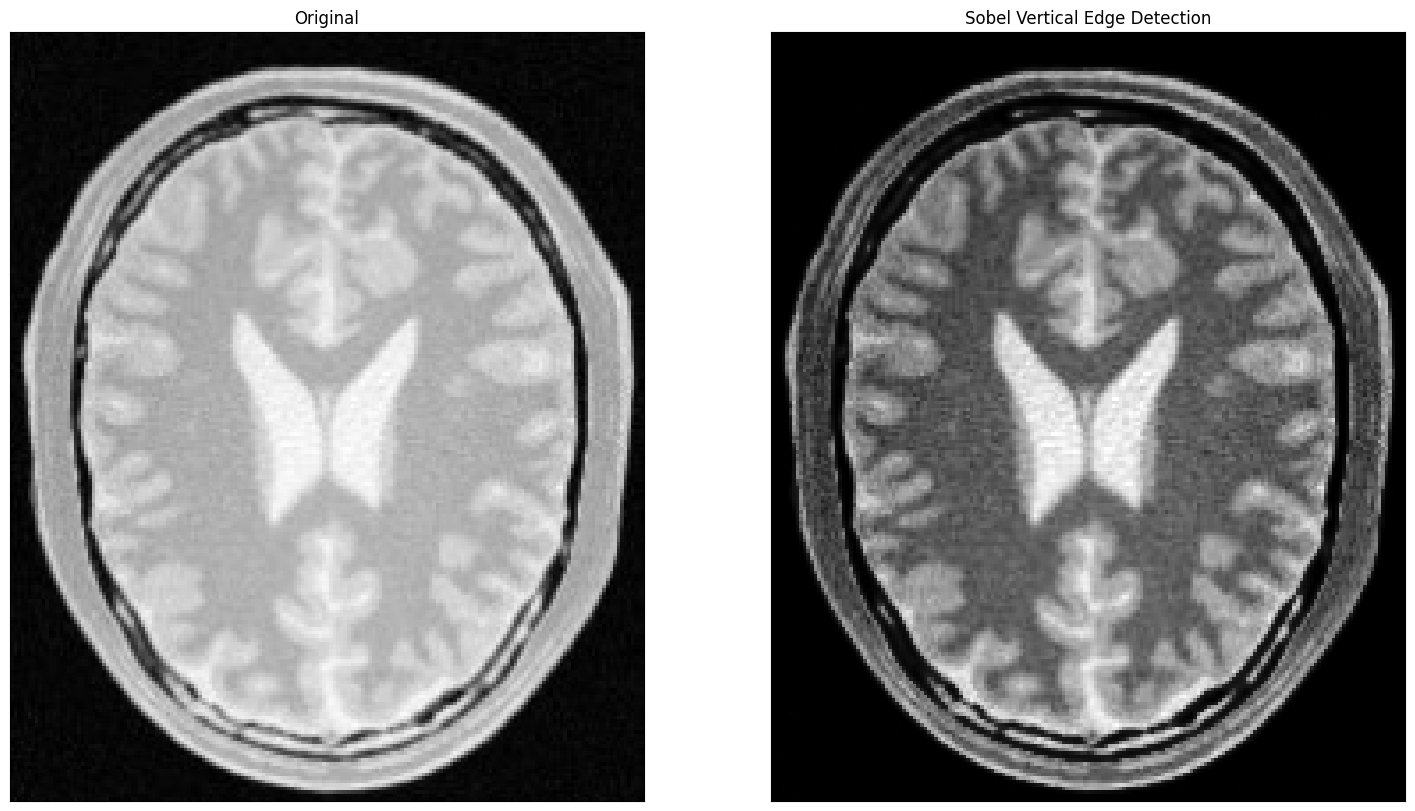

In [48]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread("F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/brain.jpg",cv.IMREAD_GRAYSCALE)
assert im1 is not None

#method 1
hist = cv.calcHist([im1],[0],None, [256],[0, 256])
plt.plot(hist)
plt.xlim([0 ,256])
plt.show()

#method 2
c = np.cumsum(hist)
t = np.array([255*c[i]/c[-1] for i in range(256)],dtype = np.uint8)

c = np.array([(15, 0), (140, 30),(240, 254)])
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1, 1] + 1, c[2,1], c[2,0] - c[1, 0]).astype('uint8')
print(len(t3))
t4 = np.linspace(c[2, 1] + 1, 255, 255 - c[2, 0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform, color='red')
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.grid(True)
plt.show()

img_orig = cv.imread('F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/brain.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
#img = cv.imshow("Image", img_orig)
#cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
#img2 =cv.imshow("Image", image_transformed)
#cv.waitKey(0)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 18))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Sobel Vertical Edge Detection')
axes[1].set_xticks([]), axes[1].set_yticks([])

cv.destroyAllWindows()

3. Consider the image shown in Fig. 3
1
. [10]
(a) Apply gamma correction to the L plane in the L
∗a
∗b
∗
color space and state the γ value.
(b) Show the histograms of the original and corrected images.

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread("F:/Sem5/1-Image Processing & Machine Vision(EN3160)/test/brain.jpg",cv.IMREAD_GRAYSCALE)
assert im1 is not None
